In [61]:
from skimage import io
import numpy as np
import numpy.matlib
import random

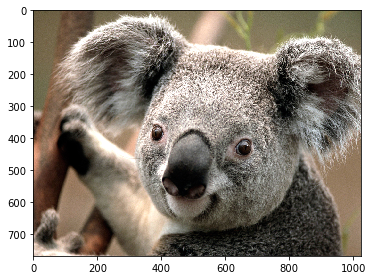

In [62]:
# Importing input image - Koala
imageKoala = io.imread('Koala.jpg')
io.imshow(imageKoala)

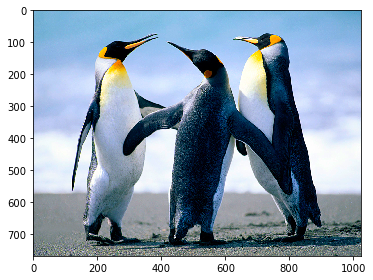

In [63]:
# Importing input image - Penguins
imagePenguins = io.imread('Penguins.jpg')
io.imshow(imagePenguins)

In [64]:
# Reading the images in variables
rows = imageKoala.shape[0]
columns = imageKoala.shape[1]
imageKoala = imageKoala/255
inputImageKoala = imageKoala.reshape(imageKoala.shape[0]*imageKoala.shape[1],3)
print(inputImageKoala.shape)

(786432, 3)


In [65]:
rows = imagePenguins.shape[0]
columns = imagePenguins.shape[1]
imagePenguins = imagePenguins/255
inputImagePenguins = imagePenguins.reshape(imageKoala.shape[0]*imagePenguins.shape[1],3)
print(inputImagePenguins.shape)

(786432, 3)


In [66]:
max_iters = 20 # Number of times the k-mean should run

In [67]:
def initCentroids(inputImage, K):
    '''
    This randomly samples k points from input image
    '''
    # InitialClusters has k randomly selected data points and each data point will have 3 RGB values
    initialClusters = random.sample(list(inputImage), K)
    return initialClusters

In [68]:
def findingCentroids (inputImage, initialClusters):
    '''
    Generates an array (same size as an input image) indicating each pixel's association with respective cluster
    '''
    k = np.size(initialClusters, 0)
    # Initializing the output array - each data point will be associated with one cluster
    clusterAssociation = np.zeros((np.size(inputImage, 0), 1))
    # Each data point will be associated with every cluster
    fullClusterAssociation = np.empty((np.size(inputImage, 0), 1))

    for i in range(0, k):
        cluster = initialClusters[i]
        # temp is scaling cluster to dimensions of inputImage. temp has same dimensions as InputImage
        temp = np.ones((np.size(inputImage, 0), 1))*cluster
        # Distance between each data point and present cluster
        distance = np.power(np.subtract(inputImage, temp), 2)
        # How far is each datapoint from each cluster (for loop)
        # print(distance.shape) - outputs : (786432, 3)
        totalDistance = np.sum(distance, axis=1)
        # print(totalDistance.shape) - outputs : (786432,)
        totalDistance = np.asarray(totalDistance)
        totalDistance.resize(np.size(inputImage, 0), 1)
        fullClusterAssociation = np.append(fullClusterAssociation, totalDistance, axis = 1)

    # Deleting first column - as it is going to be zero
    fullClusterAssociation = np.delete(fullClusterAssociation, 0, axis = 1)
    # Cluster Association indicates a list of indices for which centroid a data point is closely related
    clusterAssociation = np.argmin(fullClusterAssociation, axis = 1)
    return clusterAssociation

#computeCentroids (inputImagePenguins, initCentroids(inputImagePenguins, 10))

In [69]:

def computeCentroids(inputImage, clusterAssociation, k):
    '''
    This recomputes centroid with each iteration (of max_iterations)
    '''
    colorDimension = np.size(inputImage, 1)
    centroids = np.zeros((k, colorDimension))
    #centroids = np.zeros((k, colorDimension))
    for i in range(0, k):
        number = clusterAssociation==i
        number = number.astype(int)
        totalNumber = sum(number)
        number.resize((np.size(inputImage, 0), 1))
        # Following line gives numbers RGB values
        numberThreeDim = np.matlib.repmat(number, 1, colorDimension)
        outputMatrix = np.multiply(inputImage, numberThreeDim)
        centroids[i] = [np.sum(outputMatrix, axis = 0)]/totalNumber

        # Centroid Strength indicates total number of data points associated with that particular cluster.
        # Remember clusterAssociation stores indices of the fullClusterAssociation
        # centroidStrength = np.zeros(np.size(clusterAssociation))
        # totalCentroidStrength = 0
        # for j in clusterAssociation:
        #     if j == i:
        #         centroidStrength[j] = 1
        #         totalCentroidStrength += 1
        #     else:
        #         centroidStrength[j] = 0
        # print(centroidStrength)
        # centroidStrength.resize((np.size(inputImage, 0), 1))
        # fullCentroidStrength = np.matlib.repmat(centroidStrength, 1, colorDimension)
        # outputMatrix = np.multiply(inputImage, fullCentroidStrength)
        # centroids[i] = (1/totalCentroidStrength)*np.sum(outputMatrix, axis = 0)
    return centroids
    #print(centroids)
    #print(centroids1)

# clusterAssociation = findingCentroids (inputImagePenguins, initCentroids(inputImagePenguins, 10))
# centroids = computeCentroids(inputImagePenguins, clusterAssociation, 10)

In [70]:
def clustering(inputImage, initialCentroids, max_iters):
    '''
    Based on random set of centroids, finds cluster for each data point. And iteratively recomputes centroids
    (shifts clusters) based on total strength of respective cluster
    '''
    k = np.size(initialCentroids, 0)
    #clusterAssociation = np.zeros(np.size(inputImage, 0), 1)
    for i in range(1, max_iters):
        clusterAssociation = findingCentroids(inputImage, initCentroids(inputImagePenguins, k))
        centroids = computeCentroids(inputImage, clusterAssociation, k)
    return centroids, clusterAssociation


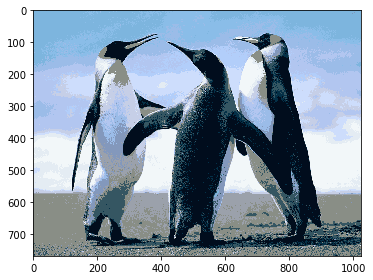

In [71]:
# This cell is for trial/troubleshooting purpose
centroids, clusterAssociation = clustering(inputImagePenguins, initCentroids(inputImagePenguins, 15), max_iters)

inputImage_Reconstructed = centroids[clusterAssociation]
inputImage_Reconstructed = np.reshape(inputImage_Reconstructed, (rows, columns, 3))
# imageio.imwrite('penguines_small.jpg', inputImage_Reconstructed)

# image_compressed = io.imread('penguines_small.jpg')
io.imshow(inputImage_Reconstructed)
io.show()

Note - Image will be displayed below its file size in KBs
	Approximate runtime is 30mins


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 2 and, 0 th time
Penguins - 
Size of a newly constructed image:  88.3525390625


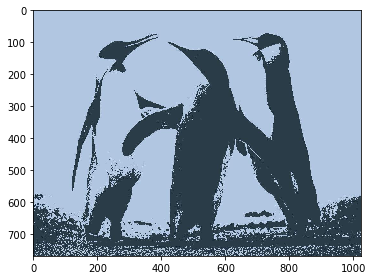

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 2 and, 0 th time
Koala - 
Size of a newly constructed image:  132.2734375


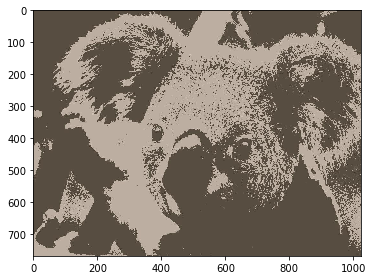

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 2 and, 1 th time
Penguins - 
Size of a newly constructed image:  83.7578125


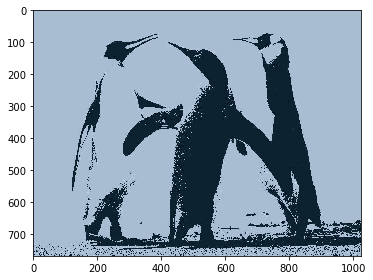

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 2 and, 1 th time
Koala - 
Size of a newly constructed image:  66.892578125


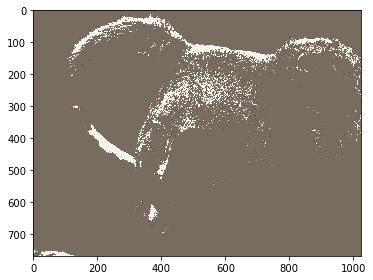

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 2 and, 2 th time
Penguins - 
Size of a newly constructed image:  83.8515625


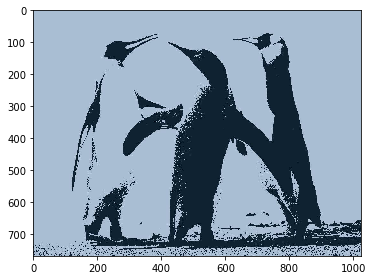

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 2 and, 2 th time
Koala - 
Size of a newly constructed image:  54.6689453125


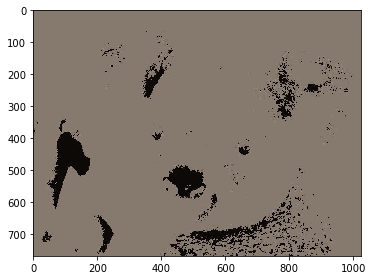

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 15 and, 0 th time
Penguins - 
Size of a newly constructed image:  111.8662109375


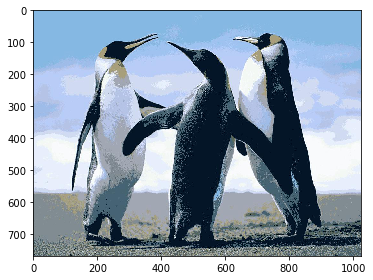

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 15 and, 0 th time
Koala - 
Size of a newly constructed image:  174.46484375


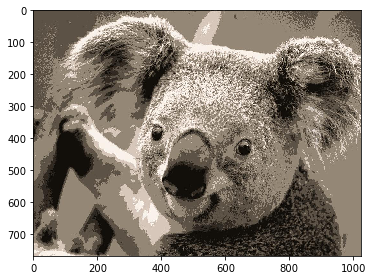

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 15 and, 1 th time
Penguins - 
Size of a newly constructed image:  110.8720703125


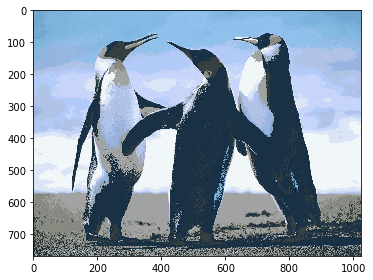

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 15 and, 1 th time
Koala - 
Size of a newly constructed image:  160.4189453125


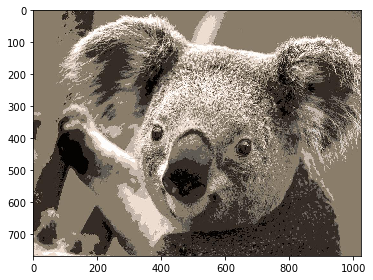

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 15 and, 2 th time
Penguins - 
Size of a newly constructed image:  122.0810546875


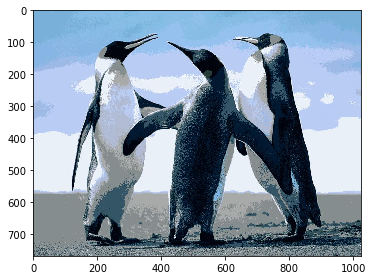

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 15 and, 2 th time
Koala - 
Size of a newly constructed image:  166.294921875


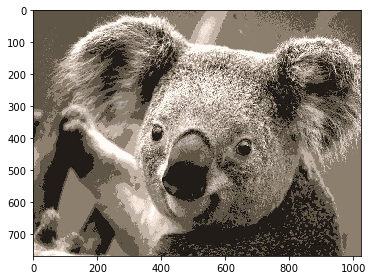

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 10 and, 0 th time
Penguins - 
Size of a newly constructed image:  122.5888671875


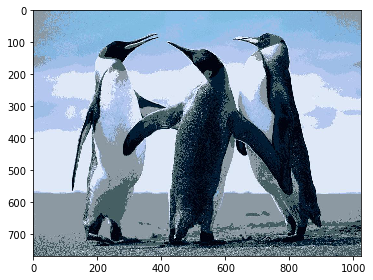

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 10 and, 0 th time
Koala - 
Size of a newly constructed image:  166.6220703125


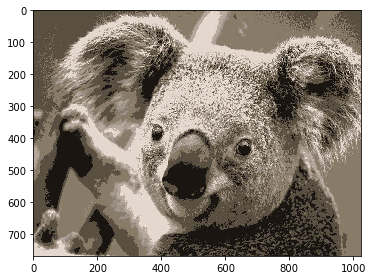

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 10 and, 1 th time
Penguins - 
Size of a newly constructed image:  107.9833984375


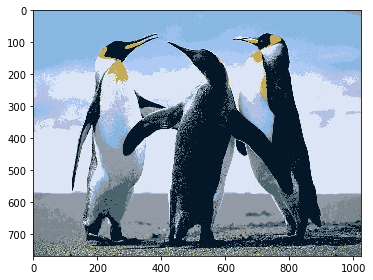

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 10 and, 1 th time
Koala - 
Size of a newly constructed image:  166.4560546875


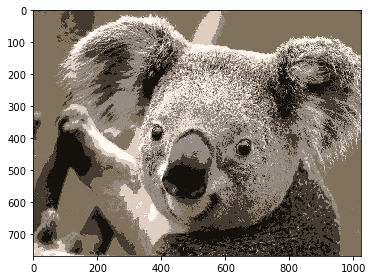

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 10 and, 2 th time
Penguins - 
Size of a newly constructed image:  118.904296875


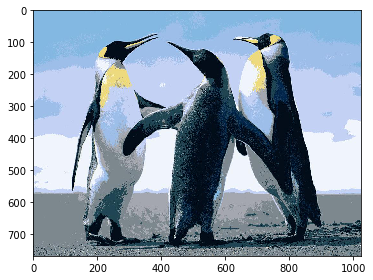

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 10 and, 2 th time
Koala - 
Size of a newly constructed image:  173.3701171875


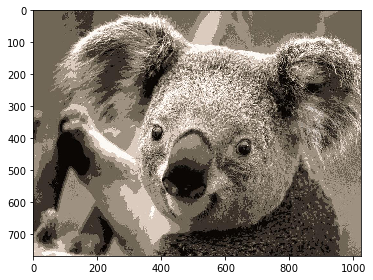

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 5 and, 0 th time
Penguins - 
Size of a newly constructed image:  98.66015625


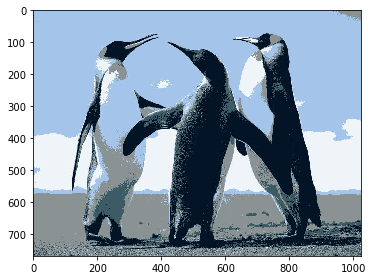

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 5 and, 0 th time
Koala - 
Size of a newly constructed image:  128.705078125


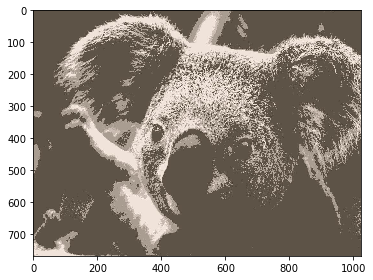

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 5 and, 1 th time
Penguins - 
Size of a newly constructed image:  112.8427734375


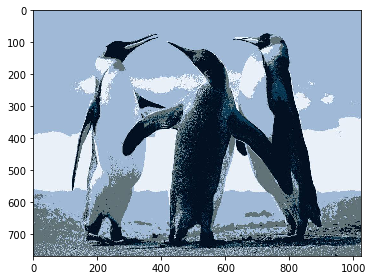

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 5 and, 1 th time
Koala - 
Size of a newly constructed image:  173.099609375


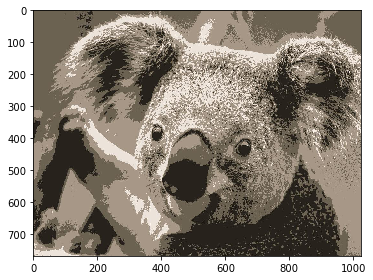

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 5 and, 2 th time
Penguins - 
Size of a newly constructed image:  93.2998046875


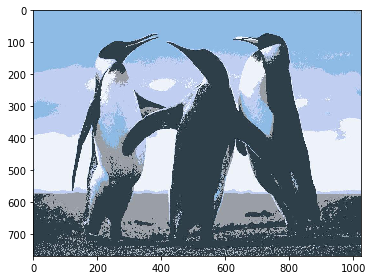

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 5 and, 2 th time
Koala - 
Size of a newly constructed image:  156.1748046875


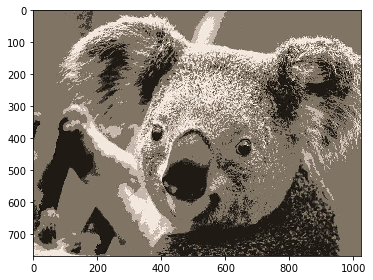

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 20 and, 0 th time
Penguins - 
Size of a newly constructed image:  121.8017578125


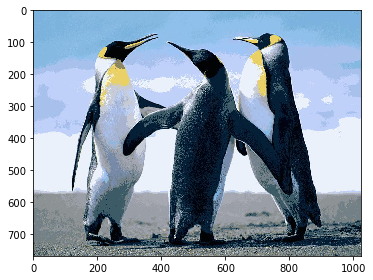

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 20 and, 0 th time
Koala - 
Size of a newly constructed image:  161.087890625


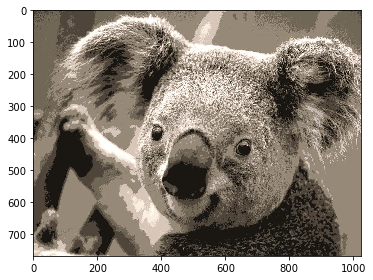

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 20 and, 1 th time
Penguins - 
Size of a newly constructed image:  117.23046875


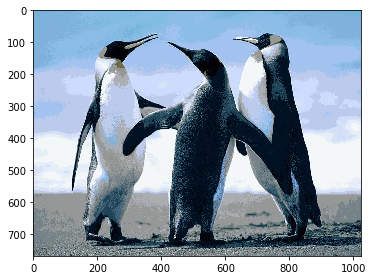

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 20 and, 1 th time
Koala - 
Size of a newly constructed image:  170.6005859375


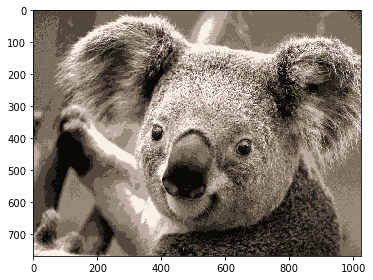

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 20 and, 2 th time
Penguins - 
Size of a newly constructed image:  119.25390625


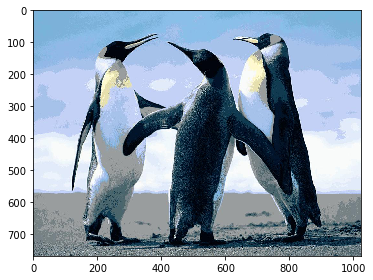

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


for k = 20 and, 2 th time
Koala - 
Size of a newly constructed image:  171.5107421875


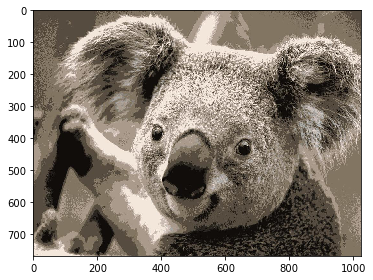

In [72]:
import imageio
import sys
import os

import numpy as np
np.seterr(divide='ignore', invalid='ignore')

'''
This essentially can qualify as main method
'''
print("Note - Image will be displayed below its file size in KBs")
print("\tApproximate runtime is 30mins")
# Giving a range of number for clusters
for k in [2, 15, 10, 5, 20]:
    # Following for loop is for different initializations
    for a in range(0, 3):
        im = [inputImagePenguins, inputImageKoala]
        for i, image in enumerate(im):
            centroids, clusterAssociation = clustering(image, initCentroids(image, k), max_iters)

            inputImage_Reconstructed = centroids[clusterAssociation]
            inputImage_Reconstructed = np.reshape(inputImage_Reconstructed, (rows, columns, 3))

            print("for k =",k,"and,",a,"th time")

            #inputImage_Reconstructed = inputImage_Reconstructed.astype(np.uint8)
            if(i == 0):
                print('Penguins - ')
                # Saving the newly constructed image with its respective K and a (random initialization) values
                imageio.imwrite('K_'+str(k)+'iter_'+str(a)+'Penguins_small.jpg', inputImage_Reconstructed)
                compressedImage = os.stat('K_'+str(k)+'iter_'+str(a)+'Penguins_small.jpg')
                print("Size of a newly constructed image: ", compressedImage.st_size/1024)
                image_compressed = io.imread('K_'+str(k)+'iter_'+str(a)+'Penguins_small.jpg')
                io.imshow(image_compressed)
                io.show()
            else:
                print('Koala - ')
                imageio.imwrite('K_'+str(k)+'iter_'+str(a)+'Koala_small.jpg', inputImage_Reconstructed)
                compressedImage = os.stat('K_'+str(k)+'iter_'+str(a)+'Koala_small.jpg')
                print("Size of a newly constructed image: ", compressedImage.st_size/1024)
                image_compressed = io.imread('K_'+str(k)+'iter_'+str(a)+'Koala_small.jpg')
                io.imshow(image_compressed)
                io.show()
